In [3]:
from gensim import corpora, models
from sklearn.decomposition import LatentDirichletAllocation
from bs4 import BeautifulSoup
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [4]:
jpm_soup = BeautifulSoup(open(r"C:\Users\User\Desktop\thesis_17_3_2022\stock_price_and_news\stock_news\dataset\jpm_final\jpm_2012_jan.html", encoding="utf8"))


In [5]:
jpm_timestamp = []
for e in jpm_soup.find_all("span", {"class": "article__timestamp"}):
    jpm_timestamp.append(e.get_text())

In [6]:
jpm_file = []
for jpm_text in jpm_soup.find_all("h3"):
    jpm_file.append(jpm_text.get_text())

In [7]:
jpm_file[-10:]

['\n\n                            \n                            DCM Advisors, LLC Buys Apple Inc, Microsoft Corp, Alphabet Inc, Sells MetLife Inc, Qorvo Inc, ...\n                        \n',
 '\n\n                            \n                            Down 38% From Its High, Is This Fintech a Buy?\n                        \n',
 '\n\n                            \n                            1 Key Metric Shows How Wells Fargo Can Recover\n                        \n',
 "\n\n                            \n                            Here's Another Reason Why Shopify Is an Unstoppable E-Commerce Stock to Buy in 2022\n                        \n",
 '\n\n                            \n                            ING Groep NV Buys Amazon.com Inc, Micron Technology Inc, JPMorgan Chase, Sells Enterprise ...\n                        \n',
 '\n\n                            \n                            Goodbye Accommodating Fed, JPMorgan Could Rise Sharply\n                        \n',
 '\n\n     

In [8]:
jpm_clean1 = []
for jpm_text1 in jpm_file:
    jpm_clean1.append(jpm_text1.replace("\n", ""))

In [9]:
jpm_remove = []
for e in jpm_clean1:
    if e not in ("Barron'sStocks Wobble With Fed Minutes Ahead",
 '',
 "Barron'sUpstart Stock Surges on Strong Revenue Forecast and Buyback Plans",
 'Personal loans and taxes: Don’t let this ‘unpleasant surprise’ happen to you if you take out a personal loan',
 'Midcareer millennials now have negotiating power—how to get the job you want, on the terms you want',
 'The 2022 Ford Mustang Mach-E—practical and high tech, with performance that lives up to its name',
 'Trying to build a business in midlife? Here are 7 tips from 2 marketing masters',
 "Barron'sNvidia's Earnings Are Today. Gaming and Data Center Are the Money Makers.",
 "Barron'sThe largest Fancy Vivid Blue Diamond to Hit Auction for $48 Million",
 'UpdatedEricsson shares slump as telecommunications firm says it may have made payments to Islamic State',
 'Ericsson shares slump as telecommunications firm says it may have made payments to Islamic State',
 'With a tiger and Jamie Dimon, JPMorgan enters the metaverse',
 'Ericsson discloses ‘serious breach of compliance rules’ in Iraq dealings',
 'The end of the pandemic may be in sight, says Moderna CEO',
 "Barron'sPublicly Traded Companies Are Vanishing. Does Private Equity Have an Edge?",
 "Barron'sWynn Stock Falls After Quarterly Loss Wider Than Estimates",
 "Barron'sThe ARK Innovation Selloff Looks Like the Dot-Com Bust. History Says It Gets Worse.",
 "Barron'sWynn Stock Falls After Quarterly Loss Wider Than Estimates",
 "Barron'sCisco Earnings Are Coming. Watch Hardware Production. ",
 'No Recent Tickers',
 'Overview'):
        jpm_remove.append(e)

In [10]:
jpm_space = []
for e in jpm_remove:
    jpm_space.append(e.strip())

In [11]:
jpm_fullstop = []
for e in jpm_space:
    jpm_fullstop.append(e.replace(".",""))

In [12]:
jpm_q = []
for e in jpm_fullstop:
    jpm_q.append(e.replace("?",""))

In [13]:
jpm_colon = []
for e in jpm_q:
    jpm_colon.append(e.replace(":",""))

In [14]:
jpm_comma = []
for e in jpm_colon:
    jpm_comma.append(e.replace(",",""))

In [15]:
jpm_percent = []
for e in jpm_comma:
    jpm_percent.append(e.replace("%","percent"))

In [16]:
jpm_lower = []
for i in range(len(jpm_percent)):
    jpm_lower.append(jpm_percent[i].lower())

In [17]:
jpm_pain = []
for e in jpm_lower:
    if e not in ( 'marketwatch',
 'company',
 'dow jones network'):
        jpm_pain.append(e)

In [18]:
jpm_pain[-10:]

['goelzer investment management inc buys exxon mobil corp jpmorgan chase fidelity national ',
 'why mastercard expects earnings to double over the next four years',
 'monday afternoon top analyst upgrades and downgrades duke energy goodyear jpmorgan juniper networks and more',
 'dcm advisors llc buys apple inc microsoft corp alphabet inc sells metlife inc qorvo inc ',
 'down 38percent from its high is this fintech a buy',
 '1 key metric shows how wells fargo can recover',
 "here's another reason why shopify is an unstoppable e-commerce stock to buy in 2022",
 'ing groep nv buys amazoncom inc micron technology inc jpmorgan chase sells enterprise ',
 'goodbye accommodating fed jpmorgan could rise sharply',
 'carl p sherr & co llc buys apple inc safety insurance group inc american express co ']

In [19]:
jpm_timestamp = []
for e in jpm_soup.find_all("span", {"class": "article__timestamp"}):
    jpm_timestamp.append(e.get_text())

In [20]:
jpm_et = []
for e in jpm_timestamp:
    jpm_et.append(e.replace("ET",""))

In [21]:
jpm_at1 = []
for e in jpm_et:
    jpm_at1.append(e.replace("at",""))

In [22]:
jpm_pm1 = []
for e in jpm_at1:
    jpm_pm1.append(e.replace("p.m.",""))

In [23]:
jpm_am1 = []
for e in jpm_pm1:
    jpm_am1.append(e.replace("a.m.",""))

In [24]:
jpm_commas = []
for e in jpm_am1:
    jpm_commas.append(e.replace(",",""))

In [25]:
jpm_fullstops = []
for e in jpm_commas:
    jpm_fullstops.append(e.replace(".",""))

In [26]:
jpm_timestamp_final = jpm_fullstops


In [27]:
jpm_date = [datetime.strptime(x,'%b %d %Y  %I:%M ') for x in jpm_timestamp_final]


In [28]:
tf_vectorizer = TfidfVectorizer(stop_words='english', max_features=500000000)


In [29]:

jpm_data = pd.DataFrame(
    {'Date': jpm_date,
     'text_headlines': jpm_pain
     
    })

In [30]:
jpm_data.head(5)

,Date,text_headlines
0,2022-02-15 09:10:00,the beginning of the ‘new normal’ more compani...
1,2022-02-15 05:02:00,jpmorgan chase & co stock rises tuesday still ...
2,2022-02-15 03:10:00,city of london’s lord mayor arrives in the us ...
3,2022-02-14 05:02:00,jpmorgan chase & co stock outperforms competit...
4,2022-02-14 01:26:00,goodyear stock plunged friday this analyst say...


In [31]:
#jpm_data.to_csv('jpm_topic_selection.csv', index = True)

In [32]:
jpm_news_matrix = tf_vectorizer.fit_transform(jpm_data['text_headlines'])


In [33]:
lda = LatentDirichletAllocation(n_components=5, learning_method='online',doc_topic_prior = 0.91,topic_word_prior= 0.9 ,random_state=0, verbose=0, n_jobs = -1)


In [34]:
lda_model = lda.fit(jpm_news_matrix)
lda_matrix = lda_model.transform(jpm_news_matrix)
lda_matrix

array([[0.25621522, 0.16299015, 0.20968865, 0.15733069, 0.2137753 ],
       [0.12843154, 0.48595924, 0.12830718, 0.12889403, 0.12840802],
       [0.18054771, 0.19217168, 0.23640578, 0.15741204, 0.23346278],
       ...,
       [0.12720006, 0.49606595, 0.1241375 , 0.12489986, 0.12769663],
       [0.13930279, 0.16955806, 0.41376831, 0.13833962, 0.13903122],
       [0.31304811, 0.29195123, 0.12796117, 0.12998773, 0.13705176]])

In [35]:
def print_topics(model, count_vectorizer, n_top_words):
    words = tf_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
      
        print("\nTopic #%d:" % topic_idx )
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
# Print the topics found by the LDA model
#print("Topics found via LDA:")
#print_topics(lda_model, jpm_news_matrix, 15)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7180 samples in 0.009s...
[t-SNE] Computed neighbors for 7180 samples in 0.407s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7180
[t-SNE] Computed conditional probabilities for sample 2000 / 7180
[t-SNE] Computed conditional probabilities for sample 3000 / 7180
[t-SNE] Computed conditional probabilities for sample 4000 / 7180
[t-SNE] Computed conditional probabilities for sample 5000 / 7180
[t-SNE] Computed conditional probabilities for sample 6000 / 7180
[t-SNE] Computed conditional probabilities for sample 7000 / 7180
[t-SNE] Computed conditional probabilities for sample 7180 / 7180
[t-SNE] Mean sigma: 0.000853
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.715881
[t-SNE] KL divergence after 1000 iterations: 1.019844


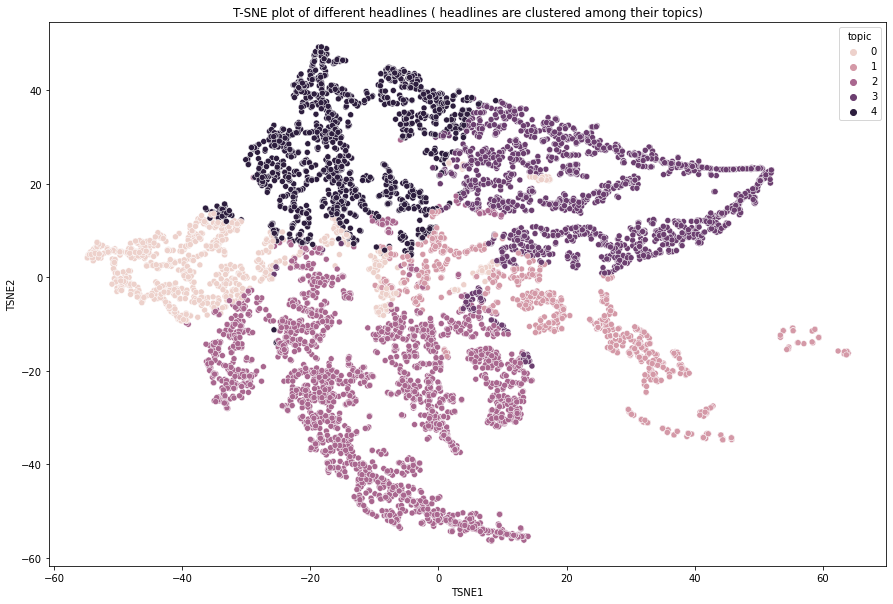

In [36]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=1000, verbose=1, random_state=0, angle=0.75)
tsne_features = model.fit_transform(lda_matrix)
df = pd.DataFrame(tsne_features)
df['topic'] = lda_matrix.argmax(axis=1)
df.columns = ['TSNE1', 'TSNE2', 'topic']
import seaborn as sns
plt.figure(figsize=(15, 10))
plt.title('T-SNE plot of different headlines ( headlines are clustered among their topics)')
ax = sns.scatterplot(x = 'TSNE1', y = 'TSNE2', hue = 'topic', data = df, legend = 'full')
plt.show()